# Matthew Gronert #
## 26 September 2022 ##

### Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

In [2]:
x_data = np.array([201, 244, 47, 287, 203, 58, 210, 202, 198, 158, 165,
          201, 157, 131,  166, 160, 186, 125, 218, 146])
y_data = np.array([592, 401, 583, 402, 495, 173, 479, 504, 510, 416, 393, 442,
          317, 311, 400, 337, 423, 334, 533, 344])
sigma_y = np.array([61, 25, 38, 15, 21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34,
           31, 42, 26, 16, 22])

In [3]:
'Only consider data points 6-20'
x = x_data[5:]
y = y_data[5:]
sig = sigma_y[5:]

In [4]:
Y = y
A = np.array([np.ones(len(x)),x]) #this is really A transpose because of the way numpy works
C_in = np.diagflat(1/(sig)**2) 

In [5]:
X = np.linalg.inv((A@C_in)@A.T)@((A@C_in)@Y)

In [6]:
var_m = np.sqrt(np.linalg.inv((A@C_in)@A.T)[1][1])

In [7]:
print('For the best fit line we have:' , 'm =', X[1], ',b =', X[0], ',and sigma_m = ', var_m,'.')

For the best fit line we have: m = 2.2325362169534166 ,b = 34.845941313398725 ,and sigma_m =  0.11031991507180255 .


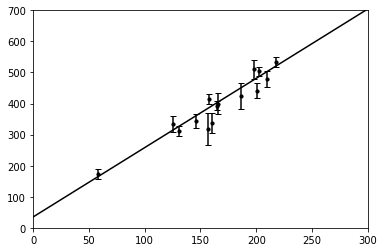

In [8]:
x_axis = np.linspace(0,300)
fit = X[1]*x_axis+X[0]

fig, ax = plt.subplots()
ax.scatter(x,y,10,'k')
ax.errorbar( x, y, yerr = sig, fmt = 'None', ecolor = 'k', capsize= 3)
ax.plot(x_axis,fit,'k',2)
plt.xlim([0,300])
plt.ylim([0,700])
ax.grid(which = 'minor')


## Problem 2

In [9]:
'Now consider all of the data.'
x = x_data
y = y_data
sig = sigma_y

In [10]:
Y = y
A = np.array([np.ones(len(x)),x]) #this is really A transpose because of the way numpy works
C_in = np.diagflat(1/(sig)**2) 

In [11]:
X = np.linalg.inv((A@C_in)@A.T)@((A@C_in)@Y)

In [12]:
var_m = np.sqrt(np.linalg.inv((A@C_in)@A.T)[1][1])

In [13]:
print('For the best fit line we have:' , 'm =', X[1], ',b =', X[0], ',and sigma_m = ', var_m,'.')

For the best fit line we have: m = 1.0767475241683258 ,b = 213.2734919759614 ,and sigma_m =  0.0774067831657561 .


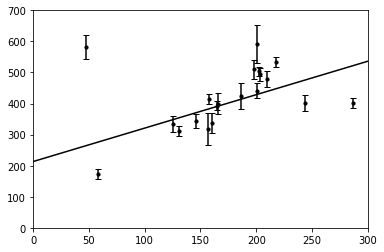

In [14]:
x_axis = np.linspace(0,300)
fit = X[1]*x_axis+X[0]

fig, ax = plt.subplots()
ax.scatter(x,y,10,'k')
ax.errorbar( x, y, yerr = sig, fmt = 'None', ecolor = 'k', capsize= 3)
ax.plot(x_axis,fit,'k',2)
plt.xlim([0,300])
plt.ylim([0,700])
ax.grid(which = 'minor')

The new points included in this anaylsis might be considered "outliers". 

## Problem 3

In [15]:
'Do everything from the last two but with a quadratic fit.'
x = x_data[5:]
y = y_data[5:]
sig = sigma_y[5:]

In [16]:
Y = y
A = np.array([np.ones(len(x)),x,x**2]) #this is really A transpose because of the way numpy works
C_in = np.diagflat(1/(sig)**2) 

In [17]:
X = np.linalg.inv((A@C_in)@A.T)@((A@C_in)@Y)

In [18]:
var_q = np.sqrt(np.linalg.inv((A@C_in)@A.T)[2][2])

In [19]:
print('For the best fit line we have:' , 'q =', X[2],',m =', X[1], ',b =', X[0], ',and sigma_q = ', var_q,'.')

For the best fit line we have: q = 0.002254145076158398 ,m = 1.6045304764425055 ,b = 72.57649611682064 ,and sigma_q =  0.002050669814280644 .


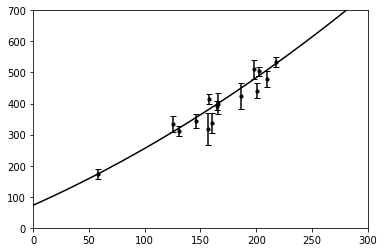

In [20]:
x_axis = np.linspace(0,300)
fit = X[2]*x_axis**2+X[1]*x_axis+X[0]

fig, ax = plt.subplots()
ax.scatter(x,y,10,'k')
ax.errorbar( x, y, yerr = sig, fmt = 'None', ecolor = 'k', capsize= 3)
ax.plot(x_axis,fit,'k',2)
plt.xlim([0,300])
plt.ylim([0,700])
ax.grid(which = 'minor')

## Problem 8 

### Implement jackknife and bootstrap to figure sigma^2_m from Problem 2

In [21]:
var=[]
for i in range(len(x_data)):
    x = np.delete(x_data,i)
    y = np.delete(y_data,i)
    sig = np.delete(sigma_y,i)
    Y = y
    A = np.array([np.ones(len(x)),x]) #this is really A transpose because of the way numpy works
    C_in = np.diagflat(1/(sig)**2) 
    var_m = np.sqrt(np.linalg.inv((A@C_in)@A.T)[1][1])
    var.append(var_m)
print('The jackknife method for calculating sigma_m gives sigma_m =',mean(var))

The jackknife method for calculating sigma_m gives sigma_m = 0.08019175395713117


In [22]:
var=[]
M = 5
N = len(x_data)
for k in range(M):
    x = np.linspace(0,0,N)
    y = np.linspace(0,0,N)
    sig = np.linspace(0,0,N)
    for i in range(N):
        j = np.random.randint(0,19)
        x[i] = x_data[j]
        y[i] = y_data[j]
        sig[i] = sigma_y[j]
    Y = y
    A = np.array([np.ones(len(x)),x]) #this is really A transpose because of the way numpy works
    C_in = np.diagflat(1/(sig)**2) 
    var_m = np.sqrt(np.linalg.inv((A@C_in)@A.T)[1][1])
    var.append(var_m)
print('The bootstrap method for calculating sigma_m gives sigma_m =',mean(var))

The bootstrap method for calculating sigma_m gives sigma_m = 0.08284252579282098


The bootstrap and jackknife methods give similar results for the variance in the slope, so it is difficult to tell which is more 'reasonable' from that alone. However it is notable that for relatively small values of M ~ 10 or slightly less, there is already good agreement with the jackknife method.